<a href="https://colab.research.google.com/github/aehzer/demo/blob/master/titled.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive, files
import pandas as pd
from matplotlib import pyplot as plt

drive.mount("/content/drive")
file_path = "/content/drive/My Drive/data/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0, 0.5, 'GDP per Capita')

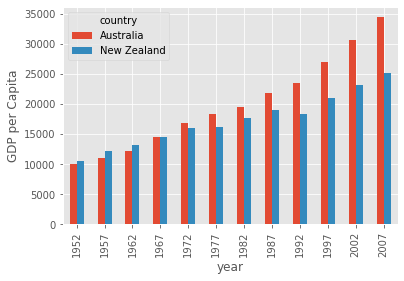

In [ ]:
data = pd.read_csv(file_path + 'gapminder_gdp_oceania.csv', index_col='country')
years = data.columns.str.strip('gpdPercap_')

data.columns = years.astype(int)
plt.style.use('ggplot')
data.T.plot(kind='bar')
plt.xlabel('year')
plt.ylabel('GDP per Capita')

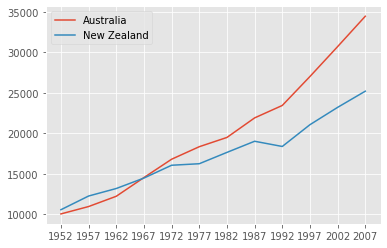

In [ ]:
gdp_australia = data.loc['Australia']
gdp_new_zealand = data.loc['New Zealand']

plt.plot(years, gdp_australia, label='Australia')
plt.plot(years, gdp_new_zealand, label='New Zealand')

plt.legend()

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text major ticklabel objects>)

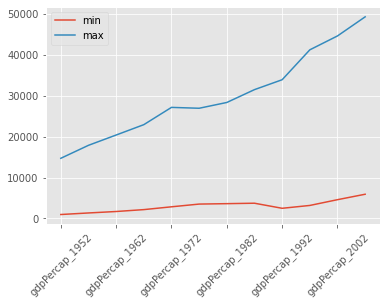

In [ ]:
data_europe = pd.read_csv(file_path + 'gapminder_gdp_europe.csv', index_col='country')
data_europe.min().plot(label='min')
data_europe.max().plot(label='max')
plt.legend()
plt.xticks(rotation=45)

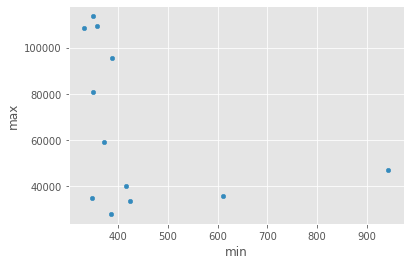

In [ ]:
data_asia = pd.read_csv(file_path + 'gapminder_gdp_asia.csv', index_col='country')
data_asia.describe().T.plot(kind='scatter', x='min', y='max')

In [ ]:
df = pd.read_csv(file_path + 'gapminder_gdp_asia.csv', index_col=0)
japan = df.loc['Japan']

In [ ]:
year = 1983
gdp_decade = 'gdpPercap_' + str(year // 10)
avg = (japan.loc[gdp_decade + str(2)] + japan.loc[gdp_decade + str(7)]) / 2
print("average", avg)

average 20880.0238


In [ ]:
def avg_gdp_in_decade(country, continent, year):
    df = pd.read_csv(file_path + 'gapminder_gdp_'+ continent +'.csv', index_col=0)
    gdp_decade = 'gdpPercap_' + str(year // 10)
    c = df.loc[country]
    avg = (c.loc[gdp_decade + str(2)] + c.loc[gdp_decade + str(7)]) / 2
    return avg

In [ ]:
def avg_gdp_in_decade1(country, continent, year):
    df = pd.read_csv(file_path + 'gapminder_gdp_'+ continent +'.csv', index_col=0)
    gdp_decade = 'gdpPercap_' + str(year//10)
    c = df.loc[country]
    total = 0
    num_years = 0

    for yr_header in c.index:
      if yr_header.startswith(gdp_decade):
        total = total + c.loc[yr_header]
        num_years += 1

    return total/num_years

print(avg_gdp_in_decade1(country='Japan', continent='asia', year=1983))

20880.0238


dynamical system

In [ ]:
def logistic_map(x,r):
    return r * x * (1 - x)

initial_population = 0.5
t_final = 10
population = [initial_population]
for t in range(t_final):
  population.append(logistic_map(x=population[t], r=1))
print(population)

[0.5, 0.25, 0.1875, 0.15234375, 0.1291351318359375, 0.11245924956165254, 0.09981216674968249, 0.08984969811841606, 0.08177672986644556, 0.07508929631879595, 0.06945089389714401]


In [ ]:
def iterate(initial_population, t_final, r):
    population = [initial_population]
    for t in range(t_final):
        population.append( logistic_map(population[t], r) )
    return population

for period in (10, 100, 1000):
    population = iterate(0.5, period, 1)
    print(population[-1])

0.06945089389714401
0.009395779870614648
0.0009913908614406382
9.998772047099823e-06


In [ ]:

def binding_energy(a,z):
  A1 = 15.67 * a
  A2 = 17.23 * (a**(2/3))
  A3 = 0.75 * ( (z**2) / (a**(1/3)) )
  A4 = 93.2 * ( ((a - (2*z))**2) / a)

  if a % 2 == 1:
    a5 = 0
  elif a % 2 == 0 and z % 2 == 0:
    a5 = 12
  elif a % 2 == 0 and z % 2 == 1:
    a5 = -12
  
  A5 = a5 / (a**(1/2))

  return A1 - A2 - A3 - A4 + A5

z = 1
Z = []
A = []
BEperNucleon = []

while z <= 100:
  a = z
  while a <= (3*z):
    B = binding_energy(a,z)
    A.append(a)
    BEperNucleon.append(B/a)
    Z.append(z)
    a += 1
  z += 1

max_BEperNucleon = max(BEperNucleon)
max_z = Z[BEperNucleon.index(max_BEperNucleon)]
stable_a = A[BEperNucleon.index(max_BEperNucleon)]
print(max_BEperNucleon, max_z, stable_a)

8.532622751365931 24 50


In [ ]:
print(binding_energy(57, 26))

465.3803496257584


In [ ]:
N = 16384
p = 1/N
total = 0
for i in range(N):
  total+=p
  print(type(total))
total==1

In [ ]:
N = 10000
p = 1/N
total = 0
for i in range(N):
  total+=p
  print(type(total))
total==1